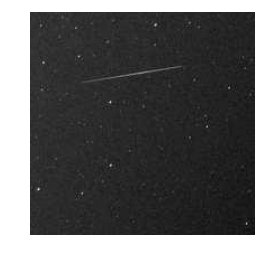

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
from scipy import misc
import numpy as np

# Load a test image tile
image = misc.imread('test.jpg')
image = image.astype('float32')
plt.axis('off')
plt.imshow(image, cmap=plt.cm.gray)

In [2]:
import tflearn
from tflearn.layers.core import input_data, fully_connected
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.estimator import regression
from tflearn.data_preprocessing import ImagePreprocessing

MODEL_FILE = '../models/transients'

# Normalise the image data
image_prep = ImagePreprocessing()
image_prep.add_featurewise_zero_center()
image_prep.add_featurewise_stdnorm()

# Convolutional network
network = input_data(shape=[None, 200, 200, 1], name='input', data_preprocessing=image_prep)
conv_1 = conv_2d(network, 12, 3, activation='relu', regularizer='L2')
pool_1 = max_pool_2d(conv_1, 2)
network = conv_2d(pool_1, 24, 3, activation='relu', regularizer='L2')
network = max_pool_2d(network, 2)
network = conv_2d(network, 36, 3, activation='relu', regularizer='L2')
network = max_pool_2d(network, 2)
network = fully_connected(network, 10, activation='tanh')
network = fully_connected(network, 2, activation='softmax')
network = regression(network, optimizer='sgd', learning_rate=0.01, loss='categorical_crossentropy', name='target')

# load the convolutional neural network model
model = tflearn.DNN(network)
model.load(MODEL_FILE)

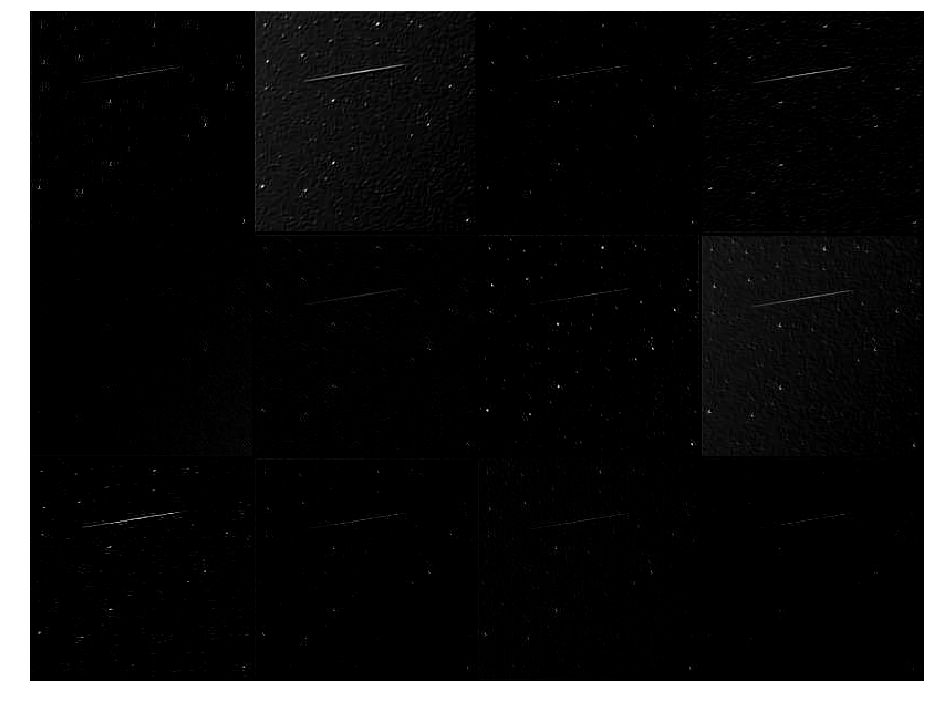

In [3]:
# run image through 1st conv layer
m2 = tflearn.DNN(conv_1, session=model.session)
yhat = m2.predict(np.reshape(image, [1, 200, 200, 1]))

# slice off outputs for first image and plot
yhat_1 = np.array(yhat[0])

def vis_conv(v,ix,iy,ch,cy,cx, p = 0) :
    v = np.reshape(v,(iy,ix,ch))
    ix += 2
    iy += 2
    npad = ((1,1), (1,1), (0,0))
    v = np.pad(v, pad_width=npad, mode='constant', constant_values=p)
    v = np.reshape(v,(iy,ix,cy,cx)) 
    v = np.transpose(v,(2,0,3,1)) #cy,iy,cx,ix
    v = np.reshape(v,(cy*iy,cx*ix))
    return v


#  h_conv1 - processed image
ix = 200  # img size
iy = 200
ch = 12   
cy = 3   # grid from channels:  12 = 3x4
cx = 4
v  = vis_conv(yhat_1,ix,iy,ch,cy,cx)
plt.figure(figsize = (16,16))
plt.imshow(v,cmap="Greys_r",interpolation='nearest')    
plt.axis('off');
